In [20]:
from src.data import *
from src.embeddings import *
from src.orcml import *
from src.plotting import *
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


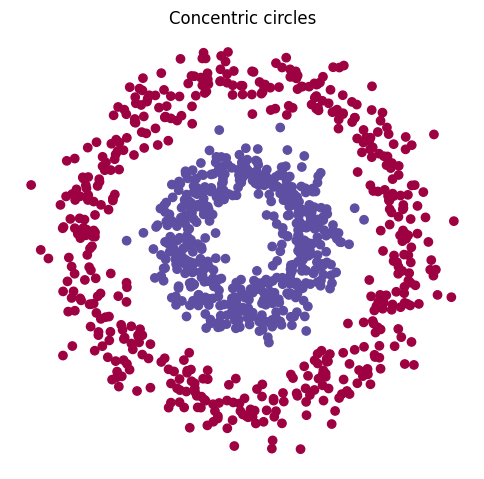

In [2]:
n_points = 1000
X, color = concentric_circles(n_points, factor=0.4, noise=0.1)
plot_data_2D(X, color, 'Concentric circles')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


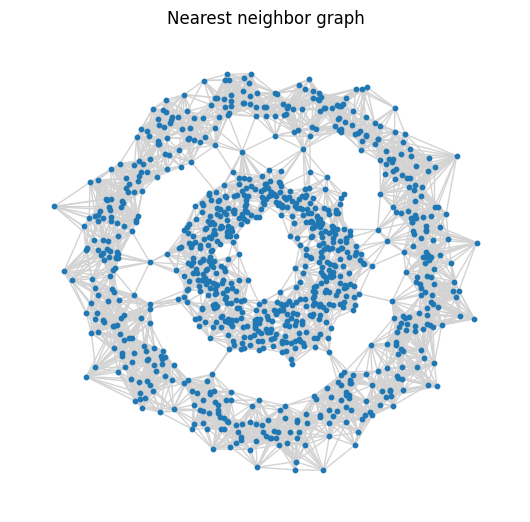

In [3]:
n_neighbors = 20
G, A = make_prox_graph(X, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(X, G, 'Nearest neighbor graph')

/home/tristan/envs/orcml/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


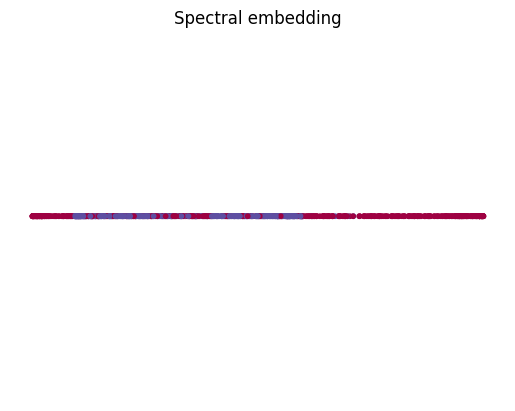

In [4]:
# run spectral embedding
Y = spectral_embedding(A, n_components=1)
plot_emb(Y, color, 'Spectral embedding')

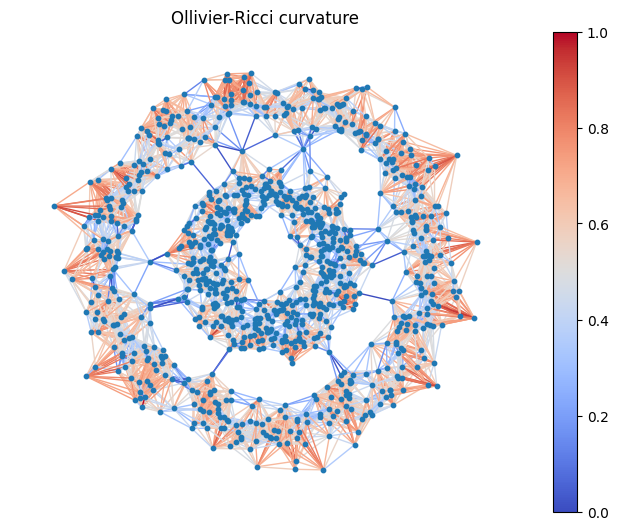

In [5]:
G_orc, orc_weights = graph_orc(G, weight='weight', alpha=0.5)
plot_graph_2D(X, G_orc, 'Ollivier-Ricci curvature', edge_color=orc_weights, colorbar=True)

Percentage of edges preserved: 0.8012293050460989


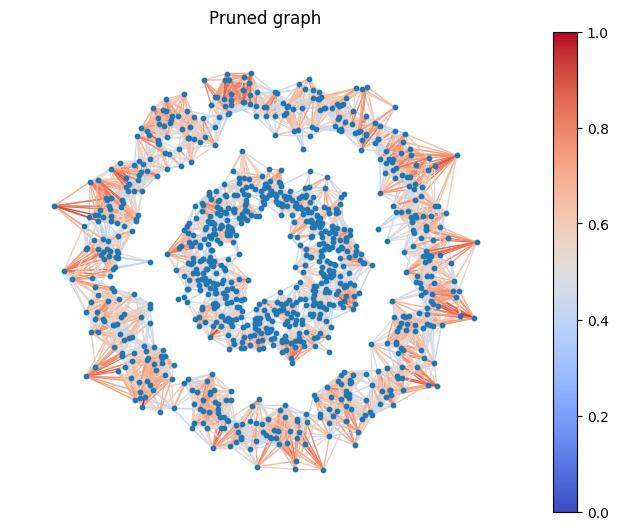

In [7]:
threshold = 0.4
pruned = prune(G_orc, threshold, X, color)
plot_graph_2D(X, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_orcs'], colorbar=True)

/home/tristan/envs/orcml/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


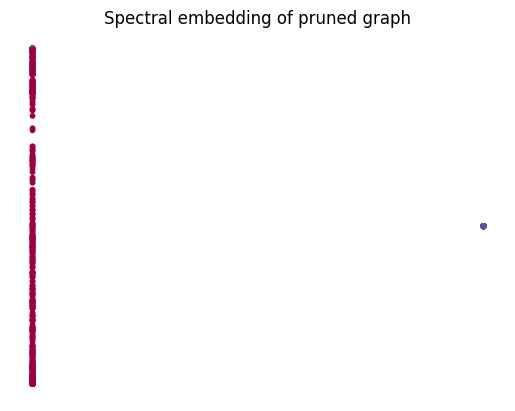

In [8]:
# run spectral embedding on pruned graph

A = nx.adjacency_matrix(pruned['G_pruned']).toarray()
Y = spectral_embedding(A, n_components=2)

plot_emb(Y, color[nx.nodes(pruned['G_pruned'])], 'Spectral embedding of pruned graph')

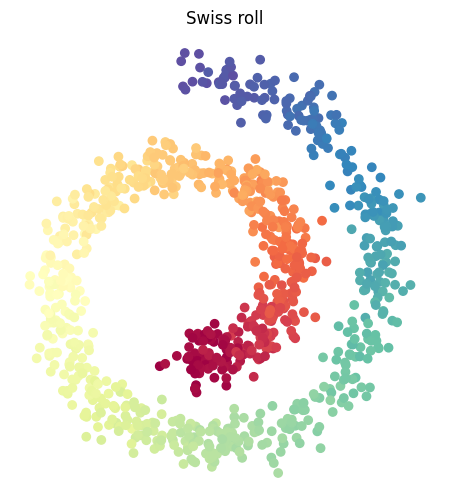

In [12]:
# swiss roll
swiss_roll_data, color = swiss_roll(n_points, noise=0.95, dim=2)
plot_data_2D(swiss_roll_data, color, 'Swiss roll')

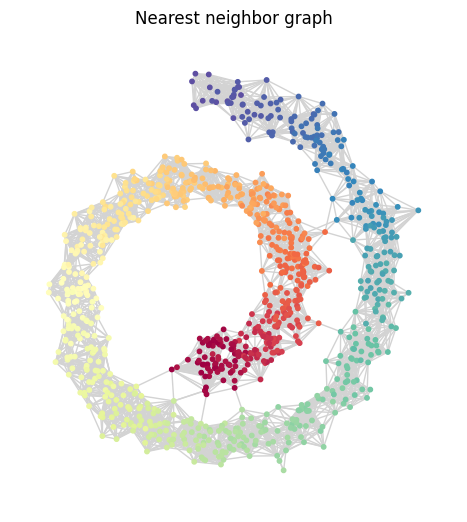

In [44]:
n_neighbors = 20
G, A = make_prox_graph(swiss_roll_data, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(swiss_roll_data, G, 'Nearest neighbor graph', node_color=color[nx.nodes(G)])

/home/tristan/envs/orcml/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


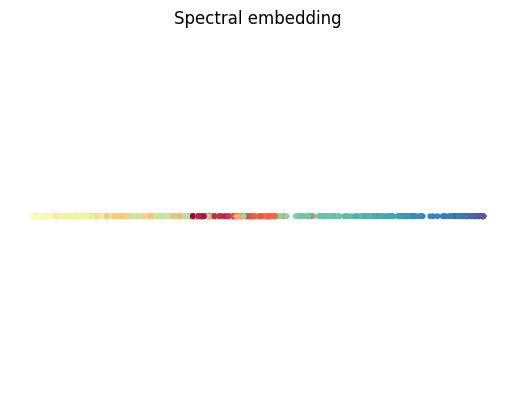

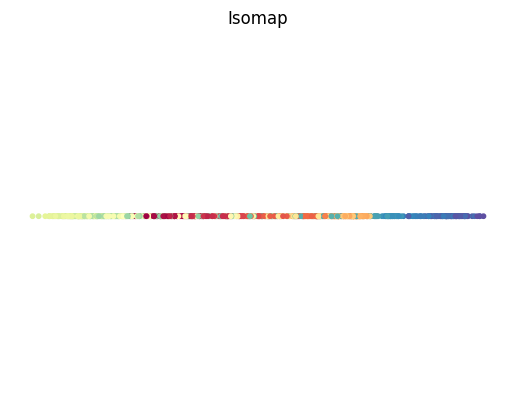

In [45]:
n_components = 1
Y_spectral = spectral_embedding(A, n_components=n_components)
plot_emb(Y_spectral, color, 'Spectral embedding')

Y_isomap = isomap(A, n_components=1)
plot_emb(Y_isomap, color, 'Isomap')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


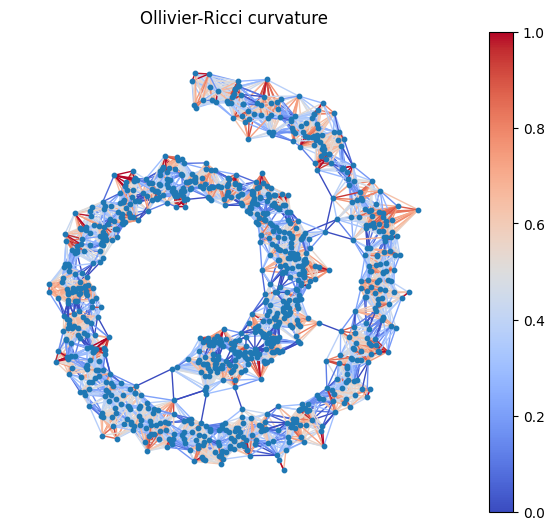

In [46]:
G_orc, orc_weights = graph_orc(G, weight='weight', alpha=0.5)
plot_graph_2D(swiss_roll_data, G_orc, 'Ollivier-Ricci curvature', edge_color=orc_weights, colorbar=True)

Percentage of edges preserved: 0.8979285499849895


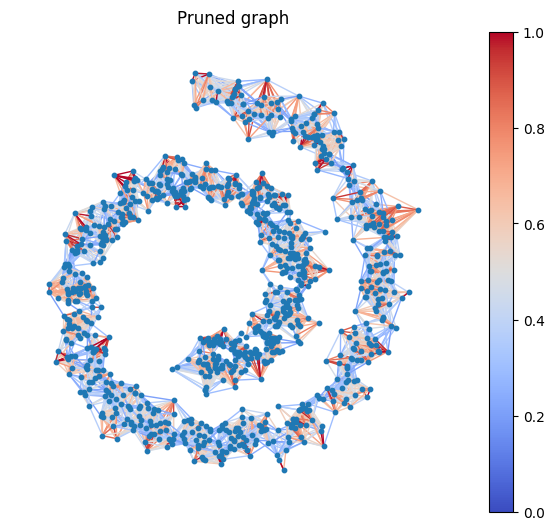

In [47]:
threshold = 0.2
pruned = prune(G_orc, threshold, swiss_roll_data, color)
plot_graph_2D(swiss_roll_data, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_orcs'], colorbar=True)

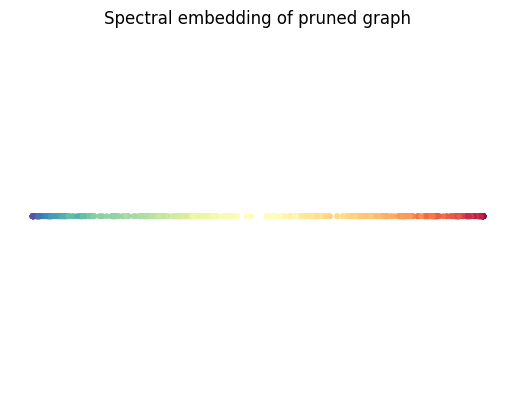

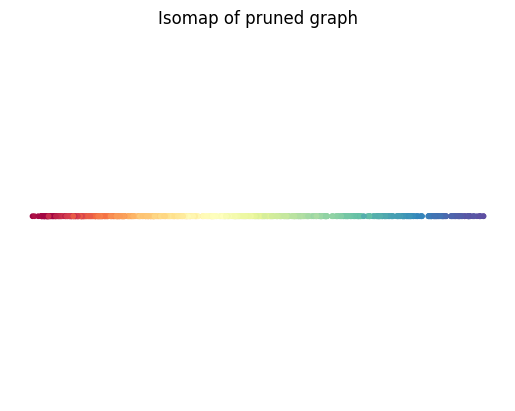

In [48]:
%autoreload 2
# run spectral embedding on pruned graph
A = nx.adjacency_matrix(pruned['G_pruned']).toarray()
colors = pruned['color_pruned'][list(pruned['G_pruned'])]
Y = spectral_embedding(A, n_components=1)
plot_emb(Y, colors, 'Spectral embedding of pruned graph')

# run isomap on pruned graph
Y = isomap(A, n_components=1)
plot_emb(Y, colors, 'Isomap of pruned graph')